In [2]:
# import the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
file_path = 'table-o-australian-energy-statistics-2024.xlsx'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
print("Available sheets:", sheet_names)

Available sheets: ['Title page', 'Method note', 'Index', 'AUS FY', 'NSW FY', 'VIC FY', 'QLD FY', 'WA FY', 'SA FY', 'TAS FY', 'NT FY', 'State summary 2022-23', 'Bioenergy breakdown FY', 'Industry breakdown FY', 'Industry and state FY', 'AUS CY', 'NSW CY', 'VIC CY', 'QLD CY', 'WA CY', 'SA CY', 'TAS CY', 'NT CY', 'State summary 2023']


In [3]:
# load AUS FY into data -- skip first 4 rows and last 4 rows as they contain text
data = xls.parse('AUS FY', skiprows=4, skipfooter=4)

# remove first column as it is empty
data = data.iloc[:, 1:]

# drop row with datatype: recall that GWh refers to Gigawatt-hours and the subsequent rows stated "Non Renewable"
data = data.iloc[2:].reset_index(drop=True)

# drop NAN rows, then drop the "Total" rows
data = data.dropna(how="all").reset_index(drop=True)
data = data[~data.iloc[:, 0].str.lower().str.startswith("total")].reset_index(drop=True)
data = data[~data.iloc[:, 0].str.lower().str.startswith("renewable")].reset_index(drop=True)


# oh see how the data is all objects .. let's put years into index and float everything and imputing 0s for NaNs
data.columns.values[0] = "fuel_type"

for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

data = data.fillna(0)

# Transpose: fuel types become columns
data.set_index("fuel_type", inplace=True)
data = data.transpose().reset_index().rename(columns={"index": "year"})

data["year"] = pd.to_datetime(
    data["year"].str.extract(r"(\d{4})")[0] + "-07-01"
)
data = data.set_index("year")

# look at the data to verify
display(data)
data.info()

fuel_type,Black coal,Brown coal,Natural gas,Oil products,Other a,"Bagasse, wood",Biogas,Wind,Hydro,Large-scale solar PV,Small-scale solar PV,Geothermal
year,,,,,,,,,,,,
1989-07-01,87573.000,33594.000,14359.000,3552.000,0.0,750.000,0.000,0.000,14880.000,0.000,0.000,0.000
1990-07-01,89511.000,36048.000,10772.000,3396.000,0.0,769.000,0.000,0.000,16103.000,0.000,0.000,0.000
1991-07-01,94325.100,34559.000,11633.000,2362.000,0.0,670.000,0.000,0.000,15768.000,0.000,10.900,0.000
1992-07-01,97872.700,33248.000,12295.000,2421.000,0.0,670.000,0.000,0.000,16953.000,0.000,13.300,0.000
1993-07-01,100544.100,34890.000,12199.000,2320.000,0.0,670.000,0.000,4.000,16649.000,0.000,15.900,0.000
1994-07-01,102522.100,35832.000,14913.000,2738.000,0.0,670.000,53.000,7.000,16239.000,0.000,18.900,0.000
1995-07-01,106089.600,39427.000,12445.000,2805.000,0.0,670.000,258.000,7.000,15731.000,0.000,23.400,0.000
1996-07-01,109452.200,41893.000,11426.000,2175.000,0.0,670.000,295.000,7.000,16852.000,0.000,27.800,0.000
1997-07-01,116969.500,46633.000,12934.000,1821.000,0.0,670.000,359.000,8.000,15733.000,0.000,33.500,0.000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 1989-07-01 to 2022-07-01
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Black coal            34 non-null     float64
 1   Brown coal            34 non-null     float64
 2   Natural gas           34 non-null     float64
 3   Oil products          34 non-null     float64
 4   Other a               34 non-null     float64
 5   Bagasse, wood         34 non-null     float64
 6   Biogas                34 non-null     float64
 7   Wind                  34 non-null     float64
 8   Hydro                 34 non-null     float64
 9   Large-scale solar PV  34 non-null     float64
 10  Small-scale solar PV  34 non-null     float64
 11  Geothermal            34 non-null     float64
dtypes: float64(12)
memory usage: 3.5 KB


## Recap From Yesterday

Yesterday we went through this data and saw two things. 
1. Energy consumption is almost double where we were in 1989, and has been steadily growing although that growth has slowed since 2006
2. Renewables have always been around, but only in 2018 did they cross the 50,000 Gigawatt-Hours threshold. 

Let's see this data in a different way. 

In [4]:
# add a total column that sums across all fuel types for each year
data['total'] = data.sum(axis=1)

# Define groupings
renewables = [
    "Bagasse, wood", "Biogas", "Wind",
    "Hydro", "Large-scale solar PV", "Small-scale solar PV", "Geothermal"
]

non_renewables = [
    "Black coal", "Brown coal", "Natural gas", "Oil products", "Other a"
]

# Compute totals
data["renewable_total"] = data[renewables].sum(axis=1)
data["nonrenewable_total"] = data[non_renewables].sum(axis=1)

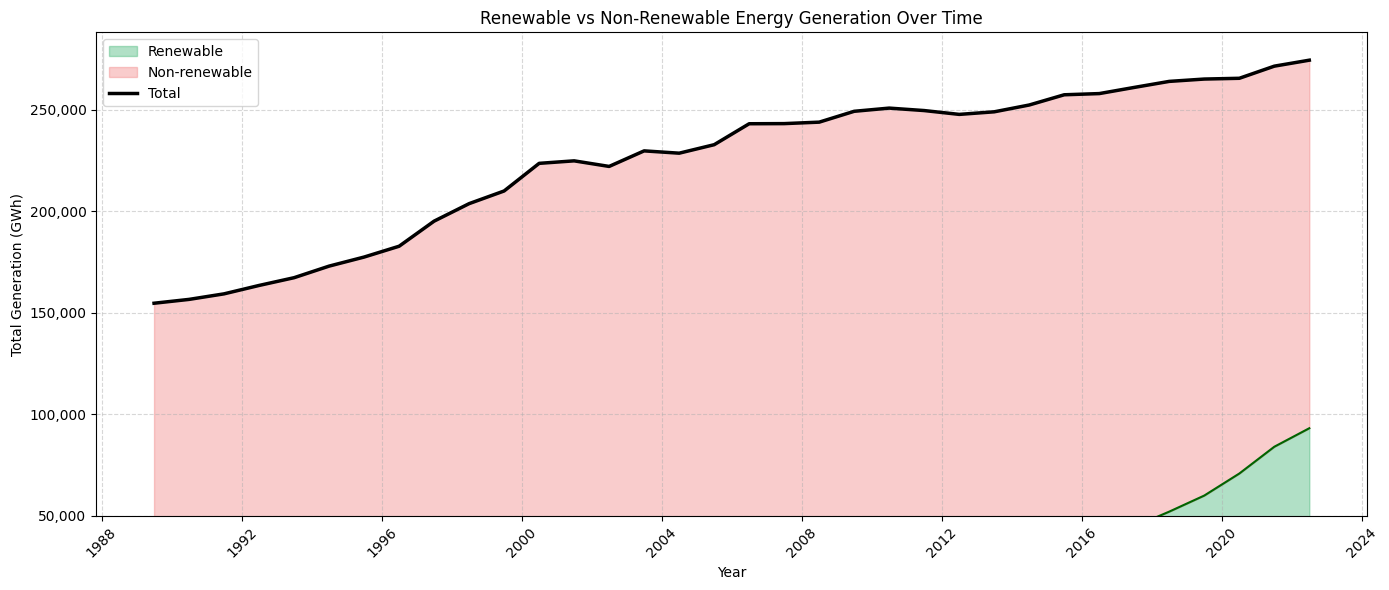

Percentage Growth:

Renewable Total:
  Last 10 years: 154.48%
  Last 5 years: 78.98%
  Last 2 years: 10.85%

Nonrenewable Total:
  Last 10 years: -14.63%
  Last 5 years: -14.45%
  Last 2 years: -3.29%


In [5]:
# set the figure size
plt.figure(figsize=(14, 6))

# 1. Fill area: renewables (bottom layer)
plt.fill_between(data.index, 0, data["renewable_total"],
                 color="mediumseagreen", alpha=0.4, label="Renewable")

# 2. Fill area: non-renewables (above renewables)
plt.fill_between(data.index, data["renewable_total"], data["total"],
                 color="lightcoral", alpha=0.4, label="Non-renewable")

# 3. Boundary line between the two
plt.plot(data.index, data["renewable_total"], color="darkgreen", linewidth=1.5)

# 4. Total line
sns.lineplot(x=data.index, y="total", data=data,
             color="black", linewidth=2.5, label="Total")

# Labels and formatting
plt.title("Renewable vs Non-Renewable Energy Generation Over Time")
plt.xlabel("Year")
plt.ylabel("Total Generation (GWh)")
plt.ylim(bottom=50000)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

import matplotlib.ticker as mticker
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.tight_layout()
plt.show()

def pct_growth(series, years):
    return ((series.iloc[-1] - series.iloc[-years]) / series.iloc[-years]) * 100

g_renew_10 = pct_growth(data["renewable_total"], 10)
g_nonrenew_10 = pct_growth(data["nonrenewable_total"], 10)
g_renew_2 = pct_growth(data["renewable_total"], 2)
g_nonrenew_2 = pct_growth(data["nonrenewable_total"], 2)


print("Percentage Growth:")
for group in ["renewable_total", "nonrenewable_total"]:
    print(f"\n{group.replace('_', ' ').title()}:")
    for y in [10, 5, 2]:
        growth = pct_growth(data[group], y)
        print(f"  Last {y} years: {growth:.2f}%")


## Serioius Production begins at 50,000 GwH
From the perspective of energy production, Renewables have only been a *real* force since 2018, but their growth is real. 

Note that difference of Renewables growth of 154% Vs. Nonrenewables retraction of -14%

Let's check out the split within the two groupings. 

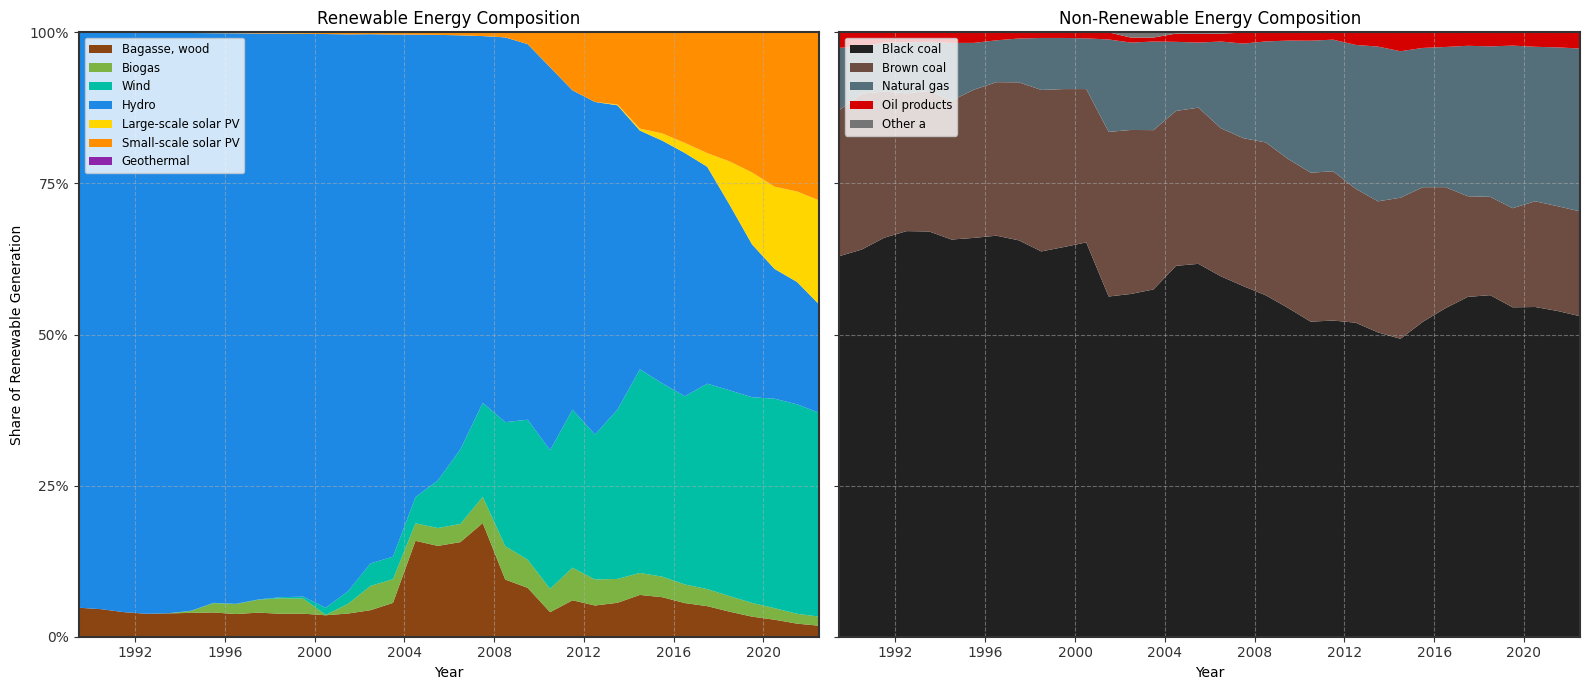

In [6]:
# Split the data into renewable and non-renewable DataFrames
df_renewable = data[renewables].copy()
df_nonrenewable = data[non_renewables].copy()

# 3. Normalize to share of group total (row-wise)
renew_share = df_renewable.div(df_renewable.sum(axis=1), axis=0)
nonrenew_share = df_nonrenewable.div(df_nonrenewable.sum(axis=1), axis=0)

# Enhanced color scheme
renewable_colors = {
    "Bagasse, wood": "#8B4513",         # stronger wood brown
    "Biogas": "#7CB342",                # brighter green
    "Wind": "#00BFA5",                  # teal green - more vibrant
    "Hydro": "#1E88E5",                 # deeper blue
    "Large-scale solar PV": "#FFD600",  # vibrant yellow
    "Small-scale solar PV": "#FF8F00",  # deeper orange
    "Geothermal": "#8E24AA"             # richer purple
}

nonrenewable_colors = {
    "Black coal": "#212121",           # richer black
    "Brown coal": "#6D4C41",           # richer brown
    "Natural gas": "#546E7A",          # blue-grey
    "Oil products": "#D50000",         # bright red
    "Other a": "#757575"               # darker grey
}


fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# After creating the figure
for i, ax in enumerate(axes):
    # Create gradient background
    gradient = np.linspace(0, 1, 100).reshape(-1, 1)
    gradient = np.tile(gradient, (1, 10))
    if i == 0:
        # Green-tinted gradient for renewable
        ax.imshow(gradient, aspect='auto', extent=[data.index[0], data.index[-1], 0, 1], 
                  alpha=0.1, cmap='Greens')
    else:
        # Blue-tinted gradient for non-renewable
        ax.imshow(gradient, aspect='auto', extent=[data.index[0], data.index[-1], 0, 1], 
                  alpha=0.1, cmap='Blues')

# Renewable
axes[0].stackplot(
    data.index,
    *[renew_share[col] for col in renewable_colors],
    labels=renewable_colors.keys(),
    colors=list(renewable_colors.values())
)
axes[0].set_title("Renewable Energy Composition")
axes[0].legend(loc='upper left', fontsize='small')
axes[0].set_ylabel("Share of Renewable Generation")

# Non-renewable
axes[1].stackplot(
    data.index,
    *[nonrenew_share[col] for col in nonrenewable_colors],
    labels=nonrenewable_colors.keys(),
    colors=list(nonrenewable_colors.values())
)
axes[1].set_title("Non-Renewable Energy Composition")
axes[1].legend(loc='upper left', fontsize='small')

# Format
for ax in axes:
    ax.set_xlabel("Year")
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        spine.set_color('#333333')

    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
    ax.tick_params(axis='both', which='major', labelsize=10, colors='#333333')

plt.tight_layout()
plt.show()


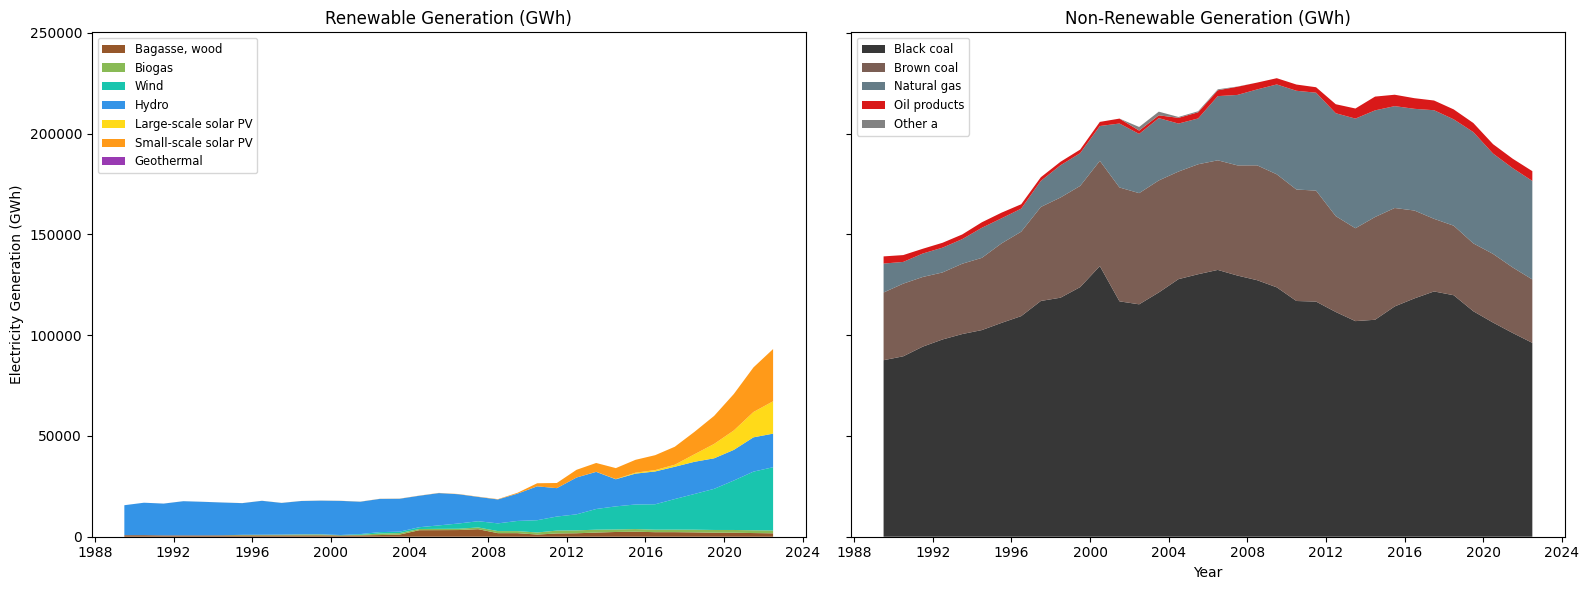

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # ← shared y-axis

# Calculate common Y-limit (from non-renewable total)
ymax = data[non_renewables].sum(axis=1).max() * 1.1

# Renewable stackplot (left)
axes[0].stackplot(data.index,
                  *[data[f] for f in renewables],
                  labels=renewables,
                  colors=[renewable_colors[f] for f in renewables],
                  alpha=0.9)
axes[0].set_title("Renewable Generation (GWh)")
axes[0].set_ylabel("Electricity Generation (GWh)")
axes[0].set_ylim(0, ymax)
axes[0].legend(loc='upper left', fontsize='small')

# Non-renewable stackplot (right)
axes[1].stackplot(data.index,
                  *[data[f] for f in non_renewables],
                  labels=non_renewables,
                  colors=[nonrenewable_colors[f] for f in non_renewables],
                  alpha=0.9)
axes[1].set_title("Non-Renewable Generation (GWh)")
axes[1].set_xlabel("Year")
axes[1].set_ylim(0, ymax)
axes[1].legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

# Composition of Different Sources Over Time

We can see with this graph how dominant Fossil Fuels has been and continues to be. We can also see again, how Hydro has historically dominated the Renewable Energy Sources, although in the last 10-20 years other sources have come out with large growth in the last 5 years. 

We can also see what looks similar to a normal distribution when it comes to Fossil Fuels. They have gone to a peak and are on the decline again. 